

---



# **1. Problem Definition:**







The project aims to solve the problem of automatically predicting an individual's Myers-Briggs Type Indicator (MBTI) personality type based on their text data, specifically their social media posts or other written communication.

`Elaboration:`

* **The Challenge:** MBTI personality typing traditionally relies on self-reported questionnaires, which can be subject to biases and inaccuracies. Analyzing textual data, such as social media posts, offers a potentially more objective and less intrusive way to infer personality traits.

* **The Goal:** The project seeks to develop a machine learning model that can accurately classify individuals into one of the 16 MBTI personality types by analyzing patterns and linguistic cues within their text data.

* **The Impact:** A successful solution would provide a valuable tool for understanding human behavior and personality in a digital context. This has applications in various domains, including:
Personalized recommendations: Tailoring recommendations for products, services, or content based on personality preferences.

* **Team building and communication:** Improving team dynamics by understanding personality differences and communication styles.

* **Mental health support:** Identifying potential mental health concerns or personality traits associated with certain conditions.

* **Marketing and advertising:** Targeting marketing campaigns based on personality profiles.

* **Recruitment and human resources:** Assessing candidate personality fit for specific roles.

In essence, the project addresses the challenge of leveraging textual data to infer personality traits and automate the process of MBTI personality typing, with the potential to enhance various applications across different fields.




---



# **2. Why this Problem**





The problem of automatically predicting MBTI personality types from text data is significant for several reasons:

`Limitations of Traditional MBTI Assessment:`

* **Self-Report Bias:** Traditional MBTI assessments rely on self-reported questionnaires, which can be influenced by biases, social desirability, and the individual's current mood or state of mind. This can lead to inaccurate or inconsistent results.

* **Time-Consuming:** Completing questionnaires and interpreting results can be time-consuming and require professional expertise.

* **Cost:** MBTI assessments often involve costs associated with materials, administration, and interpretation.

`Abundance of Text Data:`

* **Digital Footprint:** In today's digital age, people generate vast amounts of text data through social media, emails, blogs, and online forums. This readily available data provides a rich source for understanding personality and behavior.

* **Passive and Unobtrusive:** Analyzing text data offers a passive and unobtrusive way to infer personality traits, without requiring individuals to actively participate in questionnaires or assessments.

`Potential Benefits and Applications:`

* **Improved Personality Insights:** Automated prediction from text data could provide more objective and nuanced insights into personality, complementing traditional methods.

* **Personalized Experiences:** Understanding personality can enable personalized recommendations, content, and services across various domains, enhancing user experiences.

* **Enhanced Communication and Collaboration:** Knowledge of personality differences can facilitate better communication and collaboration in teams and relationships.

* **Mental Health Applications:** Personality insights can be used to identify potential mental health concerns or support individuals with specific personality traits.

* **Marketing and Recruitment:** Businesses can leverage personality data to target marketing campaigns and identify suitable candidates for specific roles.

* **Improved Accuracy:** Machine learning models are constantly evolving, offering the potential for increasingly accurate personality prediction from text.

In summary, addressing this problem has the potential to overcome limitations of traditional methods, leverage vast amounts of textual data, enable valuable applications, and contribute to a deeper understanding of human personality in the digital age.


---



# **3. Key Points of My Approach:**

**Data Loading and Exploration:** Loaded data from an Excel file, checked for missing values, and analyzed the distribution of personality types and post lengths.

**Feature Engineering:**
* **Encoded MBTI** types into binary features (IE, NS, TF, JP).
Vectorized text data using CountVectorizer and TF-IDF transformation.

* **Model Selection:** Experimented with Naive Bayes and Logistic Regression models.
* **Hyperparameter Tuning:** Used GridSearchCV for hyperparameter optimization (although further refinement is needed).

* **Model Training:** Trained separate models for each MBTI dimension.
* **Model Evaluation:**
Used classification reports, confusion matrices, and ROC curves to assess performance.
Performed error analysis using confusion matrices.

These points concisely summarize the core elements of your project's approach. They highlight the key techniques and methods you employed to achieve your goal of predicting MBTI personality types from text data.





---



# **IMPORTANT LIBRARIES**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import plotly.express as graph

from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
data = pd.read_excel('/content/sample_data/mbti_1.xlsx')
mbti = {'I': 'Introversion', 'E': 'Extroversion', 'N': 'Intution', 'S': 'Sensing', 'T': 'Thinking', 'F': 'Feeling', 'J': 'judging', 'P': 'Perceving'}

In [ ]:
data.shape

(8675, 2)

In [ ]:
data.head()

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...


In [ ]:
data.posts[0]

"http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|



---


##**Interpretation:**  
The dataset contains 8,675 rows and 2 columns: `type` and `posts`. This implies each row represents an individual, with their MBTI personality type and a text entry capturing their posts.

This initial shape check helps confirm data size, giving a rough idea of model training needs (since a larger dataset usually provides more reliable patterns but may increase computational requirements). Moving forward, we should consider both columns' roles: `type` as the label, and `posts` as the primary feature.


---




Null Values: 

type     0
posts    0
dtype: int64


No of posts for each mbti Personality: 

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)




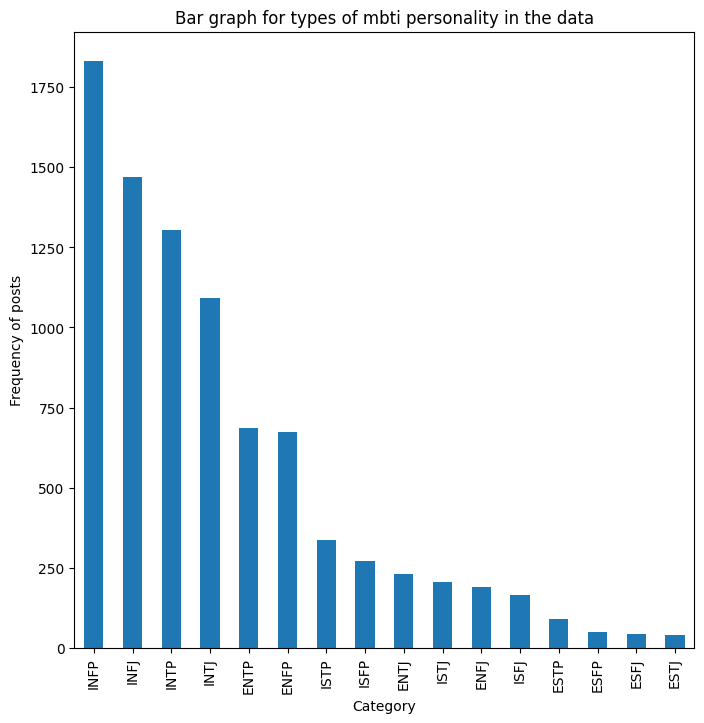

In [ ]:
print("Null Values: \n")
print(data.isnull().sum())
countCategory=data.type.value_counts()
print('\n')

print("No of posts for each mbti Personality: \n")
print(countCategory)

print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of mbti personality in the data'))
print("\n")



---


##**Interpretation and Inferences:**  
- **No Missing Values**: Both columns (`type` and `posts`) contain no missing values, ensuring that no rows are discarded due to null entries. This is advantageous, as we retain the full data for analysis without imputation or removal of entries.
- **Class Distribution**: The MBTI personality types are imbalanced. Types like INFP, INFJ, and INTP have the highest representation, while ESFJ and ESTJ have the lowest. This imbalance suggests that certain types are more prevalent, possibly affecting model training due to underrepresented classes. It may lead to bias toward the more common classes unless addressed (e.g., through resampling techniques or class weighting).

**Next Steps:**  
- **Address Class Imbalance**: Since imbalance can affect model performance, especially in multiclass classification, we should consider strategies like class weights in models or sampling methods to balance representation.
- **Prepare for Text Processing**: The `posts` column will require significant preprocessing (tokenization, stopword removal, vectorization) to convert raw text into features suitable for model input.



---




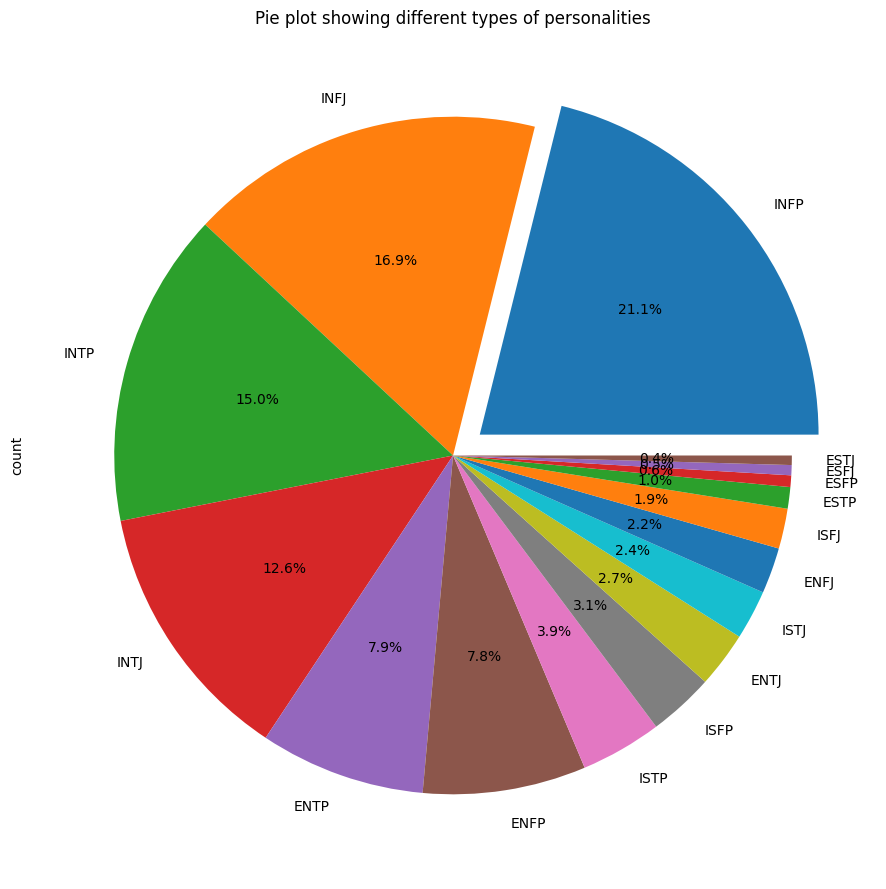

In [ ]:

data.type.value_counts().plot(kind='pie',figsize=(11,11), autopct='%1.1f%%', explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title('Pie plot showing different types of personalities')
plt.show()

Axes(0.125,0.11;0.775x0.77)


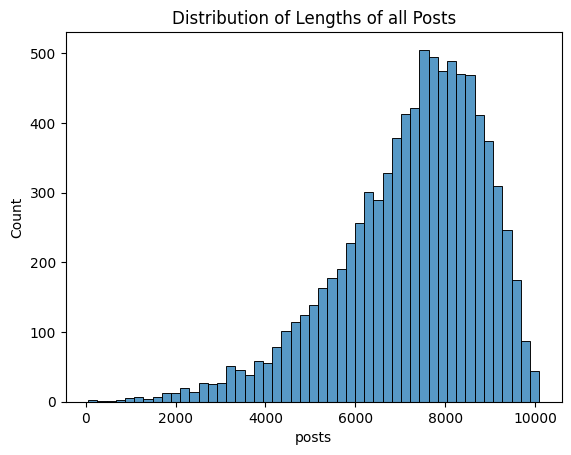

In [ ]:
df= data["posts"].apply(len)
graph=sns.histplot(df)
graph.set_title("Distribution of Lengths of all Posts")
print(graph)



---


##**Interpretation and Inferences:**  
- **Distribution Shape**: The plot shows the frequency of different post lengths, likely with a right-skewed distribution if the dataset includes a mix of shorter and longer posts. Shorter posts are often more frequent due to ease of creation, while longer posts, though less frequent, may provide richer linguistic information.
- **Post Length and Information Content**: Longer posts may capture more personality nuances as they provide a larger sample of language usage. Users who write longer posts may reveal more about traits such as detail orientation, expressiveness, or thoughtfulness. Conversely, shorter posts might indicate more direct or concise communication styles.
- **Potential Preprocessing Step**: Extreme outliers in post length (especially very long posts) might introduce noise or distort models if they contain excessive unrelated information. Filtering excessively long posts or normalizing length-based metrics could help balance this effect.
- **Impact on Text Vectorization**: Since vectorization methods like TF-IDF rely on word occurrence, varying post lengths could introduce bias toward users who write more. Normalizing or controlling for length during feature extraction might be beneficial to avoid overemphasizing prolific users.

**Next Steps:**  
- **Consider Length Normalization**: To prevent bias toward longer posts, it could be helpful to experiment with normalization techniques, such as dividing by word count or including post length as an additional feature.
- **Explore Correlation with Personality Types**: Examining if specific MBTI types correlate with typical post lengths could add interpretative value. For example, do certain types (like introverts vs. extroverts) tend to have consistently longer or shorter posts?



---




In [ ]:
def helper(ls, ch1, Type, ind):
  i=0
  for row in Type:
    if row[ind]==ch1:
      ls[i]=1
    else :
      ls[i]=0
    i= i+1
  return ls

'''This function takes dataset as input
   It adds 4 columns(dimnesions) for 4 type indicators(personality traits)'''

def Add_Type_Indicators(data):
  IE = np.zeros(data.shape[0])
  NS = np.zeros(data.shape[0])
  TF = np.zeros(data.shape[0])
  JP = np.zeros(data.shape[0])

  Type= list(data["type"])

  IE= helper(IE, 'I', Type, 0)
  NS= helper(NS, 'N', Type, 1)
  TF= helper(TF, 'T', Type, 2)
  JP= helper(JP, 'J', Type, 3)


  data.insert(2, "IE", IE, True)
  data.insert(3, "NS", NS, True)
  data.insert(4, "TF", TF, True)
  data.insert(5, "JP", JP, True)

data_copy=data.copy(deep=True)
Add_Type_Indicators(data_copy)





---


##**Interpretation and Inferences:**  
- **Dimensions Created**:
  - **IE (Introversion vs. Extraversion)**: Encodes the first character of the `type` column as 1 for "I" (Introversion) and 0 for "E" (Extraversion).
  - **NS (Intuition vs. Sensing)**: Encodes the second character as 1 for "N" (Intuition) and 0 for "S" (Sensing).
  - **TF (Thinking vs. Feeling)**: Encodes the third character as 1 for "T" (Thinking) and 0 for "F" (Feeling).
  - **JP (Judging vs. Perceiving)**: Encodes the fourth character as 1 for "J" (Judging) and 0 for "P" (Perceiving).
- **Rationale for Binary Encoding**: By breaking down each MBTI type into binary dimensions, we gain the ability to treat each trait separately. This enables us to analyze whether specific traits contribute more to prediction accuracy, and it may simplify model training since each trait can be handled as a binary label.
- **Implications for Model Training**: Training models on these dimensions individually could improve interpretability and allow us to understand which aspects of a person’s language reflect each personality trait. Additionally, using binary indicators may help address class imbalance by allowing finer control over predictions in each dimension.

**Next Steps:**  
- **Analyze Correlations Between Dimensions**: Understanding correlations among these traits can help uncover patterns and dependencies, which might influence the choice of model or interpretation of results.
- **Evaluate Individual vs. Combined Models**: Experiment with separate models for each dimension (IE, NS, TF, JP) to see if predicting individual traits outperforms or complements a combined prediction of the MBTI type.



---



In [ ]:
# Assuming 'data' is your original DataFrame containing the 'posts' column
words = list(data["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
from collections import Counter
Counter(words).most_common(40)

[('I', 389301),
 ('to', 290169),
 ('the', 270710),
 ('a', 230923),
 ('and', 219500),
 ('of', 177854),
 ('is', 128804),
 ('you', 128756),
 ('that', 127224),
 ('in', 117264),
 ('my', 104574),
 ('it', 93102),
 ('for', 83057),
 ('have', 79785),
 ('with', 77131),
 ('but', 74730),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59499),
 ('an', 59021),
 ("I'm", 57595),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53313),
 ('this', 52604),
 ('just', 48295),
 ('about', 46305),
 ('think', 46229),
 ('or', 45725),
 ("don't", 44822),
 ('so', 42941),
 ('your', 40918),
 ('do', 40868),
 ('what', 37750),
 ('at', 37566),
 ('can', 37535),
 ('if', 37049),
 ('people', 35548)]

# Plotting Classification class vs Frequency plot for IE, NS, TF, JP

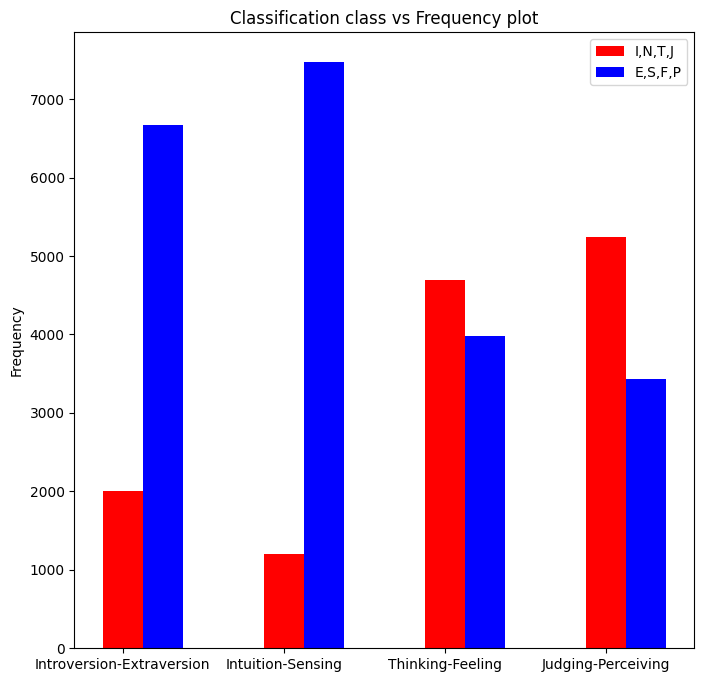

In [ ]:



I,N,T,J=data_copy['IE'].value_counts()[0],data_copy['NS'].value_counts()[0],data_copy['TF'].value_counts()[0],data_copy['JP'].value_counts()[0]
E,S,F,P=data_copy['IE'].value_counts()[1],data_copy['NS'].value_counts()[1],data_copy['TF'].value_counts()[1],data_copy['JP'].value_counts()[1]

plt.figure(figsize=(8,8))

coordinates=np.array(range(0,4))*2
plt.bar(coordinates-0.25,(I,N,T,J),0.5,label="I,N,T,J",color='red',tick_label=['Introversion-Extraversion','Intuition-Sensing','Thinking-Feeling','Judging-Perceiving'])
plt.bar(coordinates+0.25,(E,S,F,P),0.5,label="E,S,F,P",color='blue')

plt.legend()
plt.title('Classification class vs Frequency plot')
plt.ylabel('Frequency')
plt.show()



---


##**Interpretation and Inferences:**  
- **Trait Distribution Analysis**:
  - **Imbalance Observed**: If the bars are imbalanced within each pair (e.g., more "Introverts" than "Extraverts"), it indicates a dataset skewed toward certain traits. For example, the dataset may show more Introverted or Intuitive users, impacting the model's ability to generalize across underrepresented traits.
  - **Pairwise Comparison**: Each pair's distribution reveals the dominant trait. For example, if "Introversion" has a higher count than "Extraversion," we may infer that the user base tends to lean toward Introversion.
- **Implications for Modeling**:
  - **Class Imbalance Strategy**: The observed imbalance within each personality trait suggests the need to adjust class weights during model training to avoid biased predictions toward dominant traits.
  - **Interpretation of Model Predictions**: If a trait is particularly imbalanced, this might affect the model's performance on that dimension. For example, predicting "Thinking" vs. "Feeling" might be less accurate if one trait is far more common.

**Next Steps:**  
- **Rebalance Dataset**: Consider oversampling the less common traits or undersampling the dominant ones to achieve balanced training data.
- **Test Trait-Level Models**: Since these distributions differ across traits, separate models for each dimension may be beneficial for improved accuracy on each specific trait.



---




# **Correlation Matrix:**

Correlation Matrix:
           IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

HeatMap Visual:

Axes(0.125,0.11;0.62x0.77)


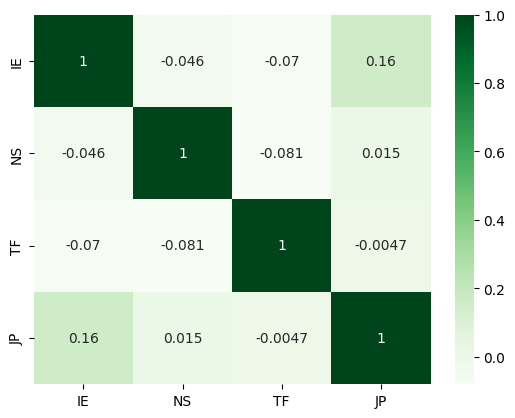

In [ ]:
columns=['IE','NS','TF','JP']
matrix=data_copy[columns].corr()

print('Correlation Matrix:\n',matrix)
print('\nHeatMap Visual:\n')
print(sns.heatmap(matrix,annot=True,cmap='Greens'))




---


##**Interpretation and Inferences:**  
- **Correlation Values**:
  - The correlation values range between -1 and 1. A value near 1 or -1 indicates a strong positive or negative correlation, respectively, while values near 0 suggest little to no relationship.
  - In this context, low correlations between most dimensions (e.g., IE and NS, TF and JP) suggest that each trait dimension is largely independent. For instance, being an Introvert (IE=1) has minimal correlation with other dimensions, indicating that personality traits are distinct in this dataset.
- **Positive and Negative Correlations**: The matrix might show a weak positive or negative correlation between certain pairs, which can offer insights into subtle relationships (e.g., a slight tendency for Introverts to score higher in Judging over Perceiving). However, these weak correlations imply that personality traits do not overlap significantly, making it feasible to model them independently.
- **Implications for Modeling**:
  - **Independent Trait Modeling**: The weak correlations confirm that each trait can be modeled independently, as they don’t strongly influence each other.
  - **Dimensional Analysis**: This independence suggests that no dimensionality reduction (like PCA) is required for these traits, as they each contribute unique information.

**Next Steps:**  
- **Consider Trait Independence in Modeling**: Given the independence of traits, models can be trained separately for each dimension, potentially improving accuracy by focusing on specific linguistic cues associated with each trait.
- **Explore Further with Factor Analysis**: Although the traits show minimal correlation, applying factor analysis could reveal deeper structure if non-linear relationships exist.



---



In [ ]:

post_list=[]
for i,j in data_copy.posts.items():
  post_list.append(j)

vector=CountVectorizer(stop_words='english',max_features=1500)
features=vector.fit_transform(post_list)

transform = TfidfTransformer()
finalfeatures =  transform.fit_transform(features).toarray()

In [ ]:
print(finalfeatures.shape)

(8675, 1500)




---


##**Interpretation and Inferences:**  
- **Tokenization and CountVectorization**:
  - The `CountVectorizer` creates a matrix where each column represents one of the 1,500 most common words (limited by `max_features=1500`). Each cell value represents the count of the word in a specific user’s posts. This sparse matrix captures the vocabulary, providing a basic frequency representation of words.
- **TF-IDF Transformation**:
  - The `TfidfTransformer` adjusts the raw word counts by considering the importance of each word across all documents. Words appearing frequently in fewer documents receive higher scores, while common words across all documents (e.g., "the," "is") get lower scores. This approach emphasizes unique terms that may correlate with personality traits, filtering out commonly used but less distinctive words.
- **Implications for Model Training**:
  - **Dimensionality and Sparsity**: With 1,500 features for each user’s posts, the resulting feature matrix is sparse, which can be computationally intensive. However, TF-IDF effectively reduces the weight of high-frequency but non-informative words, potentially enhancing model focus on distinctive terms.
  - **Feature Interpretation**: TF-IDF scores allow us to identify significant words that might indicate personality traits (e.g., "feeling" for Feelers vs. "logical" for Thinkers). Analyzing the top words could provide linguistic insights into different MBTI types.

**Next Steps:**  
- **Examine Important Words**: Reviewing the top TF-IDF-weighted words for each personality type could reveal distinctive linguistic patterns, offering interpretive insights and possibly informing feature selection.
- **Dimensionality Reduction Options**: Given the high dimensionality, consider applying PCA or Truncated SVD to reduce feature count, which could improve computational efficiency while retaining key information.




---



In [ ]:
X_data=finalfeatures
Y_data= data_copy.iloc[:,1:6]

**Interpretation:** This line assigns the variable X_data to the finalfeatures array. finalfeatures, as created earlier in your code, is a NumPy array containing the TF-IDF values for each user's posts. These TF-IDF values represent the features used to train your machine learning models.

**Inferences**

This line indicates that the TF-IDF transformed text data (stored in finalfeatures) is being used as input features (independent variables) for your model.
The features are derived from word frequency analysis after removing stop words and applying TF-IDF to weight important words.

# **MODEL TRAIN**

In [ ]:
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_data, Y_data['IE'], test_size=0.2, random_state=123)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_data, Y_data['NS'], test_size=0.2, random_state=123)
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_data, Y_data['TF'], test_size=0.2, random_state=123)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_data, Y_data['JP'], test_size=0.2, random_state=123)




---



##**Interpretation:**

These lines are using the train_test_split function from scikit-learn (sklearn.model_selection) to divide your data into training and testing sets for each of the four MBTI dimensions (IE, NS, TF, JP).



##**Inferences:**

Separate Models for Each Dimension: You are planning to train a separate model for each personality dimension (IE, NS, TF, JP) rather than a single model for the entire MBTI type. This approach is often beneficial when dealing with multi-class problems.
Data Splitting: You are using a standard 80/20 split for training and testing data. This is a common practice in machine learning.
Reproducibility: The random_state parameter ensures that your results are consistent and reproducible.
Potential Imbalance Issues: By removing the stratify parameter, you acknowledge the potential risk of introducing class imbalance in the training and testing sets, especially if the original dataset is significantly imbalanced for certain dimensions. This could lead to biased model performance.
Independent Feature Importance: This strategy allows you to explore how important the features (words) are in predicting each personality dimension separately.



---





In [ ]:


'''This function takes 4 GridSearchCV model as input.
  It fits all 4 models with thier resoective training data.
  It fincs the best estimator of GridSearchCV and uses
  it to return predicted values of 4 test sets'''
def predict(model1, model2, model3, model4):
  #IE prediction
  ypredIE=model1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)
  #NS prediction
  ypredNS=model2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)
  #TF prediction
  ypredTF=model3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)
  #JP prediction
  ypredJP=model4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

  return ypredIE, ypredNS, ypredTF, ypredJP



'''This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models). '''
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):

  print("Classification Report for Introversion(I) / Extroversion(E): \n ")
  print(classification_report(Y_test_IE, ypredIE))
  accuracyIE=accuracy_score(Y_test_IE,ypredIE)
  print("Accuracy for Introversion(I) / Extroversion(E): ",accuracyIE, "\n")
  print("\n")


  print("Classification Report for Intuition(N) / Sensing(S): \n ")
  print(classification_report(Y_test_NS, ypredNS))
  accuracyNS=accuracy_score(Y_test_NS,ypredNS)
  print("Accuracy for Intuition(N) / Sensing(S): ", accuracyNS, "\n")
  print("\n")


  print("Classification Report for Thinking(T) / Feeling(F): \n ")
  print(classification_report(Y_test_TF, ypredTF))
  accuracyTF=accuracy_score(Y_test_TF,ypredTF)
  print("Accuracy for Thinking(T) / Feeling(F): ", accuracyTF, "\n")
  print("\n")


  print("Classification Report for Judging(J) / Perceiving(P): \n ")
  print(classification_report(Y_test_JP, ypredJP))
  accuracyJP=accuracy_score(Y_test_JP,ypredJP)
  print("Accuracy for Judging(J) / Perceiving(P): ",accuracyJP, "\n")
  print("\n")



'''This function takes 4 predicted output datasets as input.
   It computes confusion matrix.
   It prints confusion matrix for all 4 predictions (models). '''
def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):

  plt.figure()
  cm = metrics.confusion_matrix(Y_test_IE, ypredIE)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Blues_r');
  plt.ylabel('Y_test_IE');
  plt.xlabel('ypredIE');
  plt.title("Confusion matrix for Introversion(I) / Extroversion(E): ", size = 17);
  plt.show()


  plt.figure()
  cm = metrics.confusion_matrix(Y_test_NS, ypredNS)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Greens_r');
  plt.ylabel('Y_test_NS');
  plt.xlabel('ypredNS');
  plt.title("Confusion matrix for Intuition(N) / Sensing(S): ", size = 17);
  plt.show()


  plt.figure()
  cm = metrics.confusion_matrix(Y_test_TF, ypredTF)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Reds_r');
  plt.ylabel('Y_test_TF');
  plt.xlabel('ypredTF');
  plt.title("Confusion matrix for Thinking(T) / Feeling(F): ", size = 17);
  plt.show()


  plt.figure()
  cm = metrics.confusion_matrix(Y_test_JP, ypredJP)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Purples_r');
  plt.ylabel('Y_test_JP');
  plt.xlabel('ypredJP');
  plt.title("Confusion matrix for Judging(J) / Perceiving(P): ", size = 17);
  plt.show()



'''This function takes 4 predicted probabilitie datasets as input.
   It plots ROC Curve for all 4 predictions (models). '''
def print_roc_auc_curve(probIE, probNS, probTF, probJP):

  fp_IE, tp_IE, val = roc_curve(Y_test_IE, probIE[:,1])
  fp_NS, tp_NS, val = roc_curve(Y_test_NS, probNS[:,1])
  fp_TF, tp_TF, val = roc_curve(Y_test_TF, probTF[:,1])
  fp_JP, tp_JP, val = roc_curve(Y_test_JP, probJP[:,1])

  plt.figure()
  plt.plot(fp_IE, tp_IE, linestyle='--', color='red', label='Introversion(I) / Extroversion(E)')
  plt.plot(fp_NS, tp_NS, linestyle='--', color='blue', label='Intuition(N) / Sensing(S)')
  plt.plot(fp_TF, tp_TF, linestyle='--', color='pink', label='Thinking(T) / Feeling(F)')
  plt.plot(fp_JP, tp_JP, linestyle='--', color='green', label='Judging(J) / Perceiving(P)')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()

#**Naive Bayes Model**

In [ ]:
naivegb=GaussianNB()
grid1=GridSearchCV(naivegb,{},cv=5)
grid2=GridSearchCV(naivegb,{},cv=5)
grid3=GridSearchCV(naivegb,{},cv=5)
grid4=GridSearchCV(naivegb,{},cv=5)
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.44      0.63      0.52       412
         1.0       0.87      0.75      0.81      1323

    accuracy                           0.72      1735
   macro avg       0.66      0.69      0.66      1735
weighted avg       0.77      0.72      0.74      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7244956772334294 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.31      0.62      0.42       219
         1.0       0.94      0.80      0.86      1516

    accuracy                           0.78      1735
   macro avg       0.62      0.71      0.64      1735
weighted avg       0.86      0.78      0.81      1735

Accuracy for Intuition(N) / Sensing(S):  0.7804034582132565 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  



---



##**Interpretation:**

Data Preparation and Feature Engineering: Before this stage, you likely performed steps such as:

* Loading data containing user posts and their MBTI personality types.

* Preprocessing the text data (e.g., cleaning, tokenization).
Creating numerical features using techniques like CountVectorizer and TF-IDF.

* Splitting the data into training and testing sets for each MBTI dimension (IE, NS, TF, JP).

`Model Training and Prediction (predict function):`

* The predict function takes four GridSearchCV objects (one for each dimension) as input.
For each dimension:
* It fits the corresponding GridSearchCV object to the training data (X_train_IE, Y_train_IE, etc.). This step likely involves cross-validation to find the best hyperparameters.

It uses the best estimator (model) found by GridSearchCV to make predictions on the test data (X_test_IE, etc.).

The function returns four sets of predictions, one for each dimension.

`Performance Evaluation` (print_classification_report function):

* The print_classification_report function takes the predictions for each dimension as input.
* For each dimension:
It calculates and prints the classification report, including metrics like accuracy, precision, recall, and F1-score. This report provides a detailed assessment of the model's performance for that specific personality trait.

**Naive Bayes Model Context:** This code snippet is likely used within the context of your Naive Bayes model implementation, where the predict function is called with GridSearchCV objects initialized with Gaussian Naive Bayes as the base model.



**Model Selection and Hyperparameter Tuning:** The use of GridSearchCV suggests an attempt to optimize the model's hyperparameters. However, if the parameter grid was empty (as indicated in your earlier code), the models were likely trained with default parameters.

**Dimensional Analysis:** Predicting and evaluating performance separately for each MBTI dimension allows for a granular understanding of how well the model captures different personality traits.

**Focus on Classification Metrics:** The print_classification_report function emphasizes standard classification metrics (accuracy, precision, recall, F1-score), indicating your focus on evaluating the model's ability to correctly classify personality types.

**Potential for Improvement:** As discussed previously, there's room for improvement by tuning hyperparameters more extensively, exploring feature selection, considering alternative models or ensemble methods, and addressing potential class imbalance in the data.

**Iterative Refinement:** This code snippet represents a step in an iterative process of model development, where you are likely experimenting with different techniques to enhance the prediction accuracy and robustness.

Overall, by combining the provided functions with your Naive Bayes model implementation, you are creating a more structured and comprehensive approach to predicting MBTI personality types. This approach involves data preparation, model training and prediction, and detailed performance evaluation. Continued exploration and refinement of this pipeline can lead to further improvements in your model's predictive capabilities.



---



<Figure size 640x480 with 0 Axes>

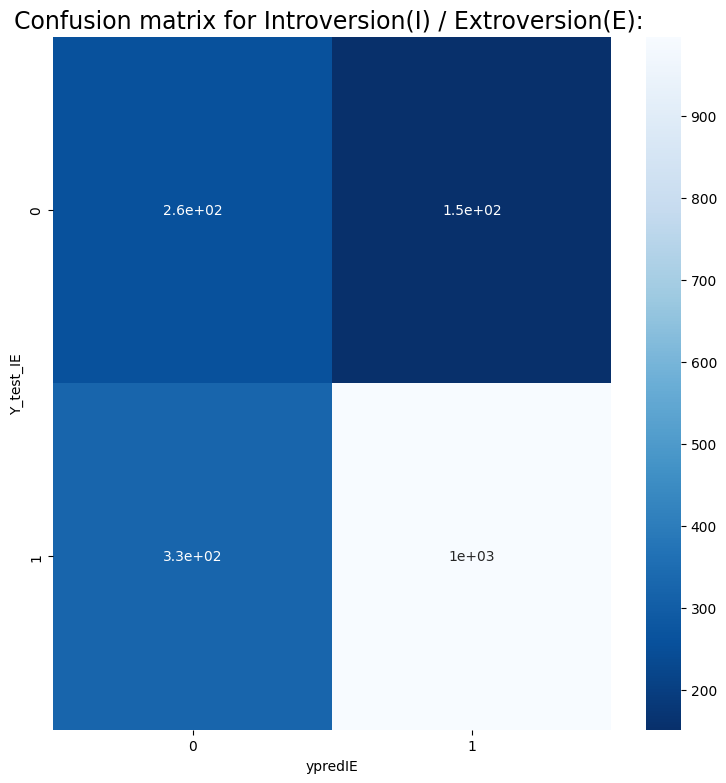

<Figure size 640x480 with 0 Axes>

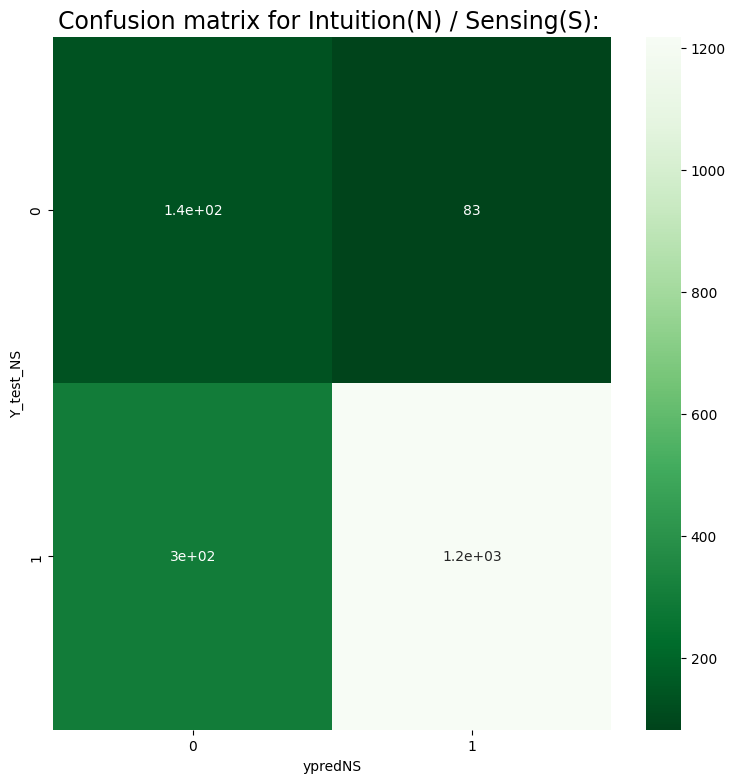

<Figure size 640x480 with 0 Axes>

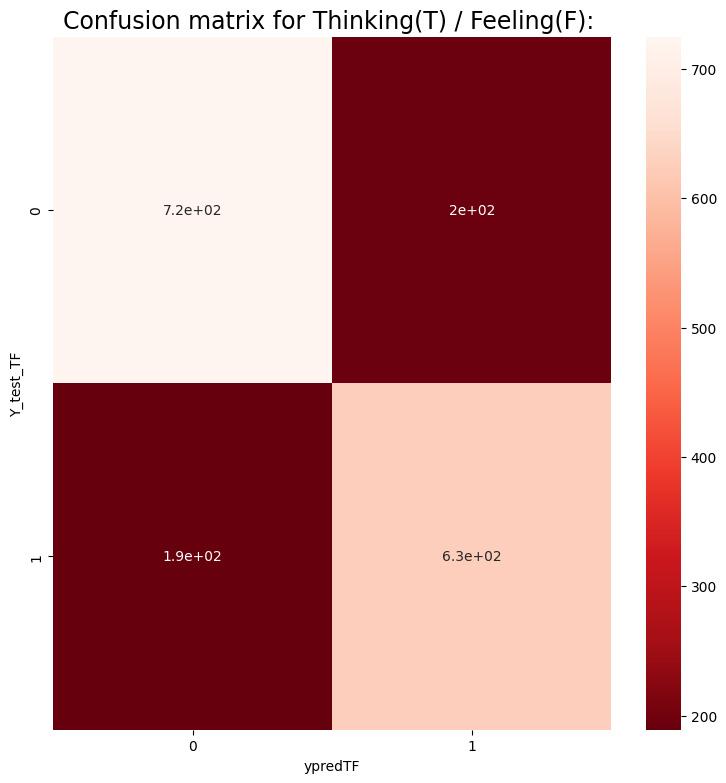

<Figure size 640x480 with 0 Axes>

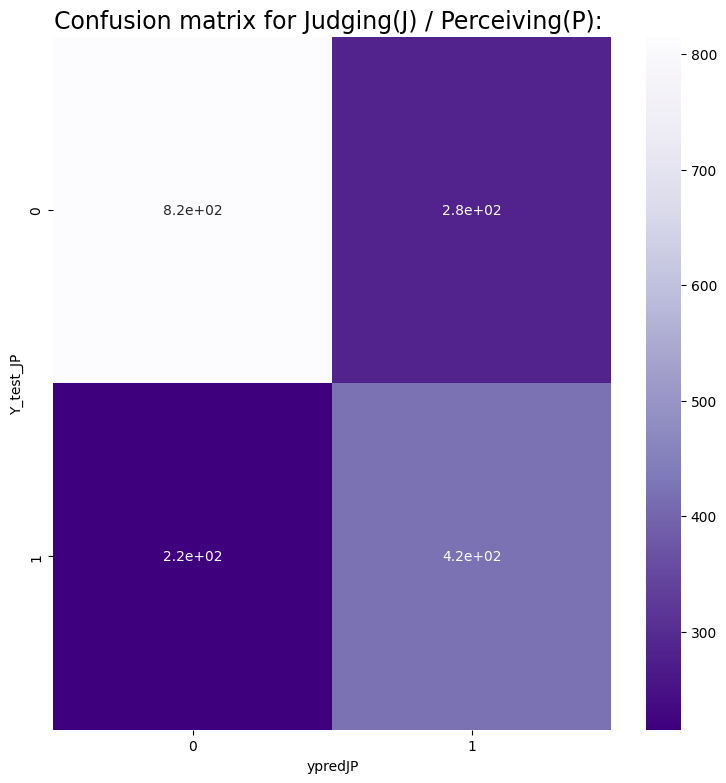

In [ ]:

print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

# ROC Curve

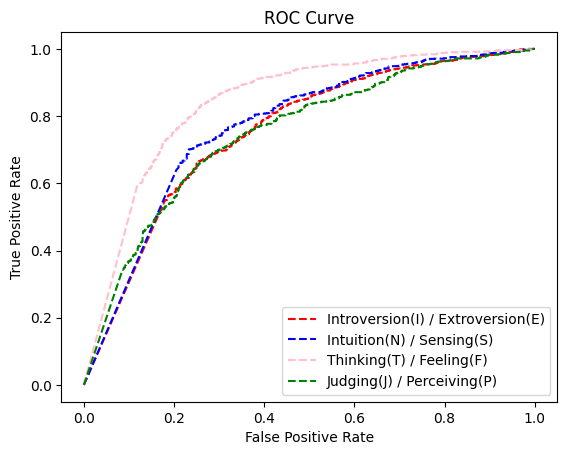

In [ ]:

print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))



---



##**Interpretation:**

This line of code calls the print_roc_auc_curve function, which is designed to plot the Receiver Operating Characteristic (ROC) curve for each of the four MBTI dimensions (IE, NS, TF, JP). It passes the predicted probabilities from the best estimators of your GridSearchCV objects (grid1, grid2, grid3, grid4) as input to the function.

##**Inferences:**

`ROC Curve Visualization: `This code aims to visualize the performance of your classification models for each dimension using ROC curves. ROC curves are a useful tool for evaluating the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various classification thresholds.
Model Comparison: By plotting ROC curves for all four dimensions, you can visually compare the performance of your models across different aspects of personality. This helps identify which dimensions are easier or harder to predict.
AUC Evaluation: The ROC curve is often accompanied by the Area Under the Curve (AUC) metric. A higher AUC indicates better model performance. While not explicitly calculated in this snippet, it's likely used within the print_roc_auc_curve function to provide a quantitative measure of performance.
Probabilistic Predictions: The use of predict_proba suggests that your models are providing probabilistic predictions, indicating the likelihood of a data point belonging to each class (e.g., 70% probability of being Introverted). This probabilistic information is essential for generating ROC curves.
Overall Performance Assessment: This visualization provides a comprehensive view of your models' ability to discriminate between different personality traits across all four MBTI dimensions.



---



#Logistic Regression model

In [ ]:

log =LogisticRegression(max_iter=500)

grid1= GridSearchCV(log,{},cv=5)
grid2= GridSearchCV(log,{},cv=5)
grid3= GridSearchCV(log,{},cv=5)
grid4= GridSearchCV(log,{},cv=5)

ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)

print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)


Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.85      0.47      0.61       412
         1.0       0.86      0.97      0.91      1323

    accuracy                           0.86      1735
   macro avg       0.85      0.72      0.76      1735
weighted avg       0.85      0.86      0.84      1735

Accuracy for Introversion(I) / Extroversion(E):  0.8553314121037464 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.81      0.27      0.41       219
         1.0       0.90      0.99      0.95      1516

    accuracy                           0.90      1735
   macro avg       0.86      0.63      0.68      1735
weighted avg       0.89      0.90      0.88      1735

Accuracy for Intuition(N) / Sensing(S):  0.9002881844380404 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  



---



##**Interpretation:**

This code defines a Logistic Regression model and applies it to your MBTI personality prediction task for each of the four dimensions (IE, NS, TF, JP). It uses GridSearchCV for hyperparameter tuning and then evaluates the model's performance using a classification report.

`Here's a step-by-step interpretation:`

**Model Initialization:** A Logistic Regression model is created with a specified max_iter of 500. This parameter controls the maximum number of iterations the solver will take to converge.
**GridSearchCV Setup:** Four GridSearchCV objects (grid1, grid2, grid3, grid4) are initialized, one for each dimension. These objects will perform a cross-validated search to find the best hyperparameters for the Logistic Regression model on each dimension's data. However, in your code, the hyperparameter grid is empty ({}), meaning no hyperparameter tuning is actually performed. GridSearchCV will simply evaluate the model with its default parameters.
**Model Training and Prediction:** The predict function is called, which likely trains the Logistic Regression models for each dimension using the respective training data and then uses the trained models to predict on the test data.
Performance Evaluation: Finally, the print_classification_report function is called, which likely calculates and prints the classification report for each dimension, including metrics like accuracy, precision, recall, and F1-score, to assess the model's performance.


##**Inferences:**

Logistic Regression for Personality Prediction: You are using Logistic Regression, a common algorithm for binary classification, to predict each dimension of the MBTI personality type. This approach assumes a linear relationship between the input features (TF-IDF values) and the probability of belonging to a specific personality trait (e.g., Introverted or Extroverted).
Hyperparameter Optimization (Not Performed): Although GridSearchCV is used, the empty hyperparameter grid indicates that no actual hyperparameter tuning is being done. This means the model is trained and evaluated with its default parameters.

**Cross-Validation for Robustness:** The cv=5 parameter in GridSearchCV suggests 5-fold cross-validation is employed. This technique splits the training data into 5 parts, training the model on 4 parts and validating on the remaining one. This process is repeated 5 times, and the results are averaged, leading to a more robust performance estimate.
Dimensional Analysis: Separate models are trained and evaluated for each MBTI dimension, allowing for an analysis of how well the model performs in predicting each personality trait individually.


**Performance Reporting:** The classification report provides detailed insights into the model's performance, allowing you to assess its effectiveness in terms of different metrics for each personality dimension.



---



<Figure size 640x480 with 0 Axes>

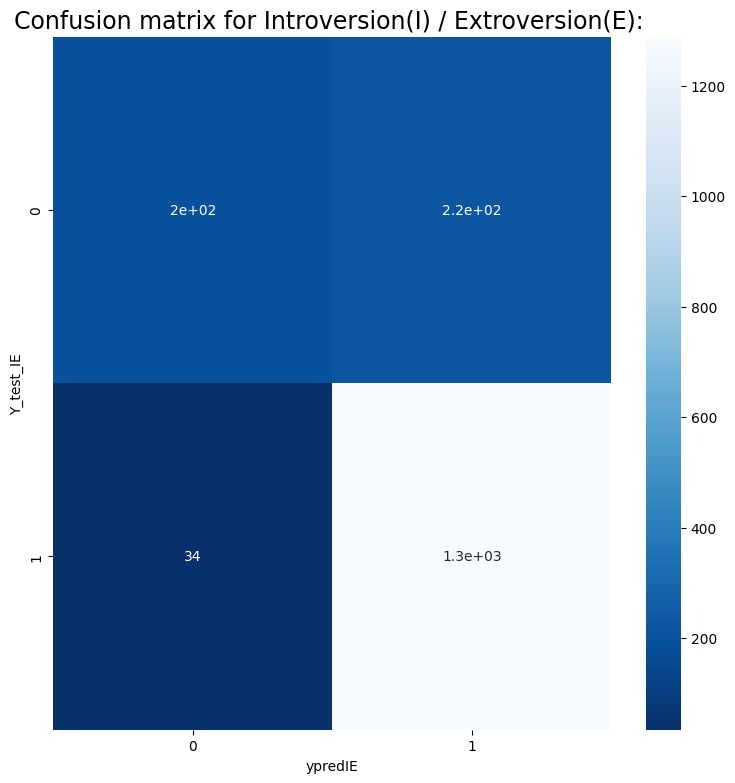

<Figure size 640x480 with 0 Axes>

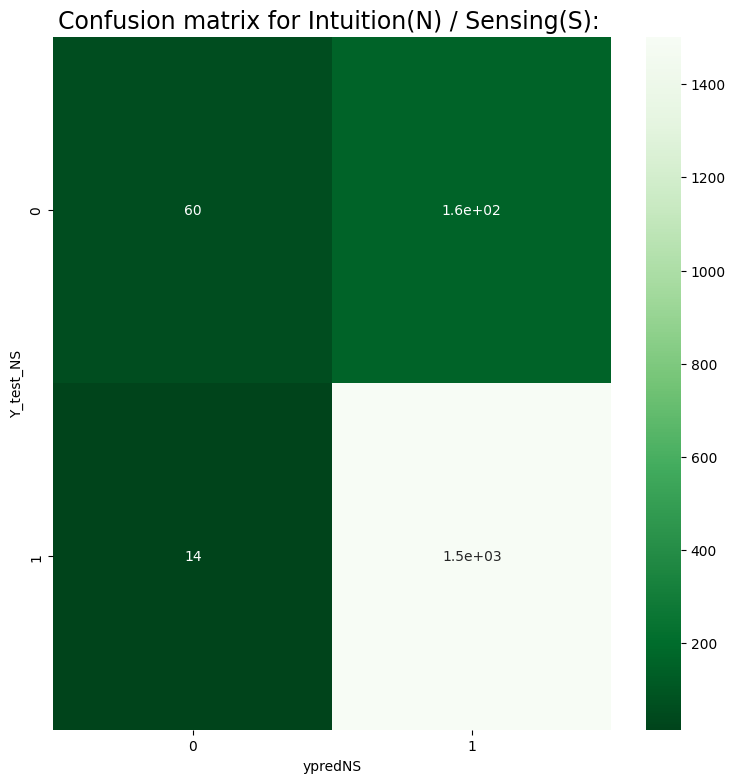

<Figure size 640x480 with 0 Axes>

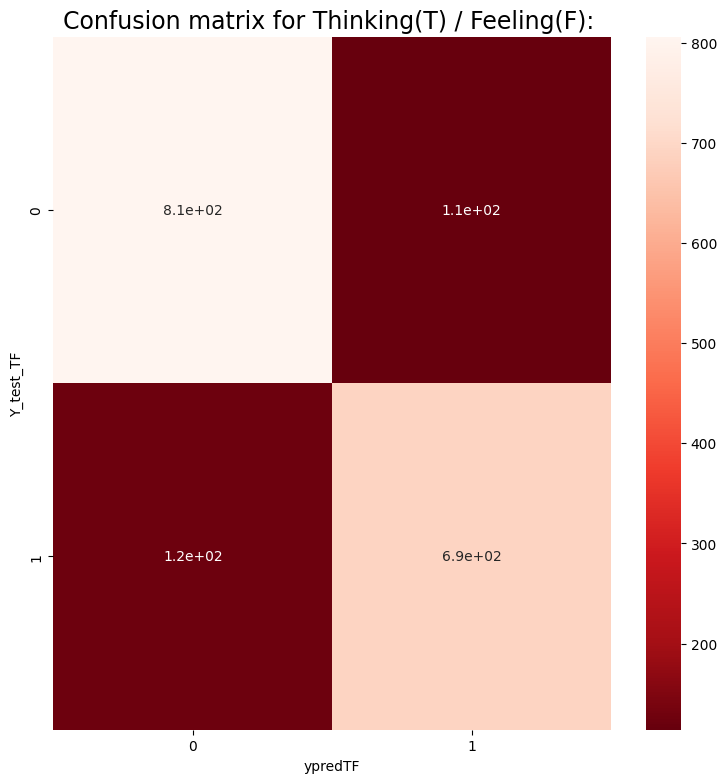

<Figure size 640x480 with 0 Axes>

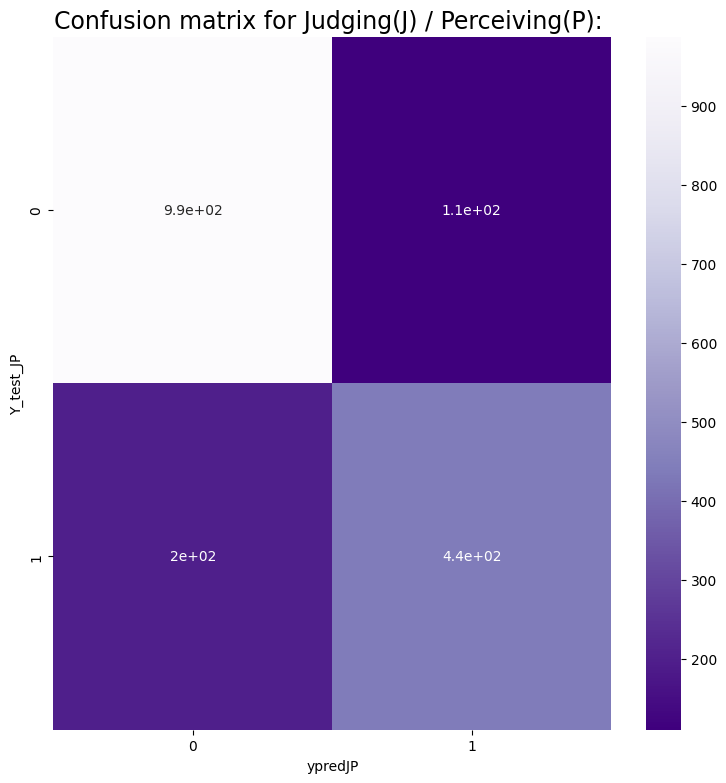

In [ ]:

print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)



---



##**Interpretation:**

This line of code calls the print_confusion_matrix function, which is likely designed to create and display confusion matrices for each of the four MBTI dimensions (IE, NS, TF, JP). It takes the predicted values for each dimension (ypredIE, ypredNS, ypredTF, ypredJP) as input.

##**Inferences:**

**Visualization of Model Performance:** This code aims to visualize the performance of your classification models for each dimension using confusion matrices. A confusion matrix is a table that shows the number of true positives, true negatives, false positives, and false negatives for each class, providing a clear picture of where the model is making correct and incorrect predictions.

**Error Analysis:** Confusion matrices are helpful for identifying the types of errors the model is making. For instance, you can see if the model is frequently confusing Introverts with Extroverts or vice-versa, which can help in understanding the limitations of the model and identifying areas for improvement.

**Dimensional Comparison:** By creating confusion matrices for all four dimensions, you can compare the model's performance across different personality traits. This allows you to identify which dimensions are easier or harder to predict based on the patterns of errors.

**Diagnostic Tool:** Confusion matrices serve as a valuable diagnostic tool to understand the strengths and weaknesses of your models for each MBTI dimension. They complement other evaluation metrics like accuracy, precision, recall, and F1-score by providing a more detailed breakdown of prediction outcomes.
Overall Model Assessment: This visualization contributes to a comprehensive assessment of your models' ability to classify different personality traits. It helps you gain insights into the model's behavior and guide further refinement strategies.



---



# **KNN CLASSIFIER**

Best accuracy: 0.30 achieved with k=20


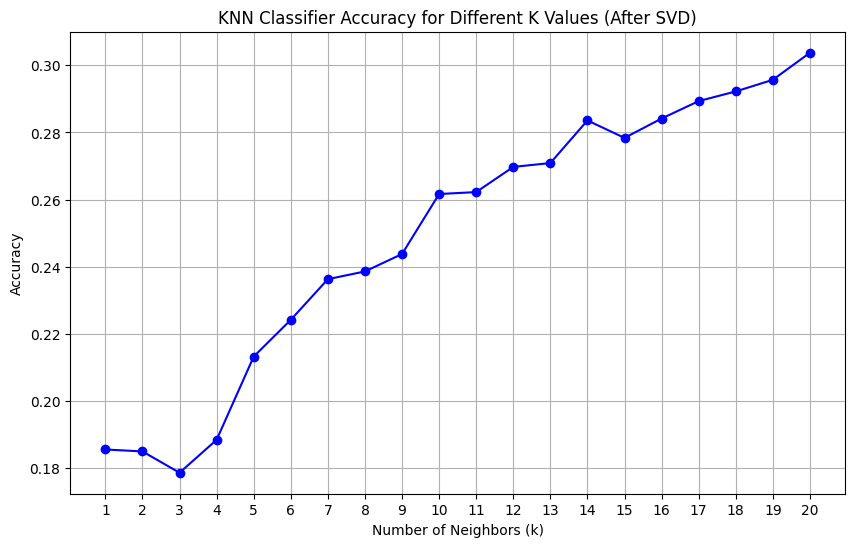

In [ ]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['posts'])
y = data['type']


svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


best_accuracy = max(accuracies)
best_k = k_values[accuracies.index(best_accuracy)]
print(f"Best accuracy: {best_accuracy:.2f} achieved with k={best_k}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Classifier Accuracy for Different K Values (After SVD)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()




---


## **Interpretation:**
**Text Vectorization:**
The CountVectorizer converts the 'posts' column into a bag-of-words model, transforming text data into numerical form for machine learning.

**Dimensionality Reduction with SVD:**
Truncated Singular Value Decomposition (SVD) reduces the dimensions of the feature space, preserving the most important components and helping with computational efficiency. The n_components=100 specifies that only the top 100 components are retained.

**Model Training with KNN:**
A K-Nearest Neighbors (KNN) classifier is trained on the reduced data. The model is tested with different values of k (the number of neighbors) to find the optimal one based on accuracy.

`Finding the Best K:`

The accuracy is calculated for a range of k values (from 1 to 20). The best accuracy and corresponding k value are identified.

**Plotting:**
A plot visualizes how accuracy changes with different k values, helping to identify the optimal k for the model.

##**Inferences:**
**Dimensionality Reduction:** SVD helps improve performance by reducing noise and overfitting, especially in large datasets.

**Optimal K Selection:** The best k value maximizes classification accuracy. Plotting the accuracy for different values of k helps in selecting the optimal model configuration.

**Performance:** A higher accuracy indicates a better-performing model. If the accuracy is low, further tuning of k or other aspects like SVD components might be necessary.



---



# **Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.43      0.22      0.29        41
        ENFP       0.60      0.61      0.60       125
        ENTJ       0.61      0.52      0.56        44
        ENTP       0.59      0.56      0.57       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.50      0.14      0.22         7
        ESTP       0.83      0.33      0.48        15
        INFJ       0.58      0.59      0.59       288
        INFP       0.65      0.74      0.69       370
        INTJ       0.56      0.65      0.60       193
        INTP       0.65      0.70      0.67       293
        ISFJ       0.77      0.53      0.63        45
        ISFP       0.60      0.45      0.52        53
        ISTJ       0.63      0.43      0.51        44
        ISTP       0.61      0.52      0.56        67

    accuracy         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


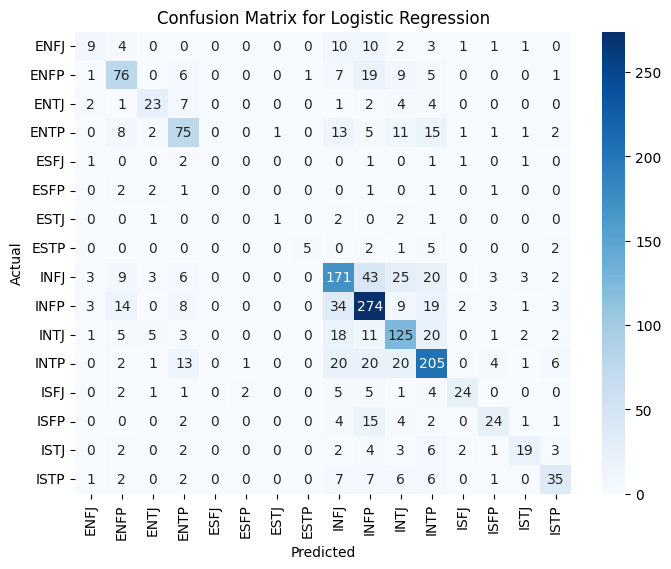

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.43      0.22      0.29        41
        ENFP       0.60      0.61      0.60       125
        ENTJ       0.61      0.52      0.56        44
        ENTP       0.59      0.56      0.57       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.50      0.14      0.22         7
        ESTP       0.83      0.33      0.48        15
        INFJ       0.58      0.59      0.59       288
        INFP       0.65      0.74      0.69       370
        INTJ       0.56      0.65      0.60       193
        INTP       0.65      0.70      0.67       293
        ISFJ       0.77      0.53      0.63        45
        ISFP       0.60      0.45      0.52        53
        ISTJ       0.63      0.43      0.51        44
        ISTP       0.61      0.52      0.56        67

    accuracy         

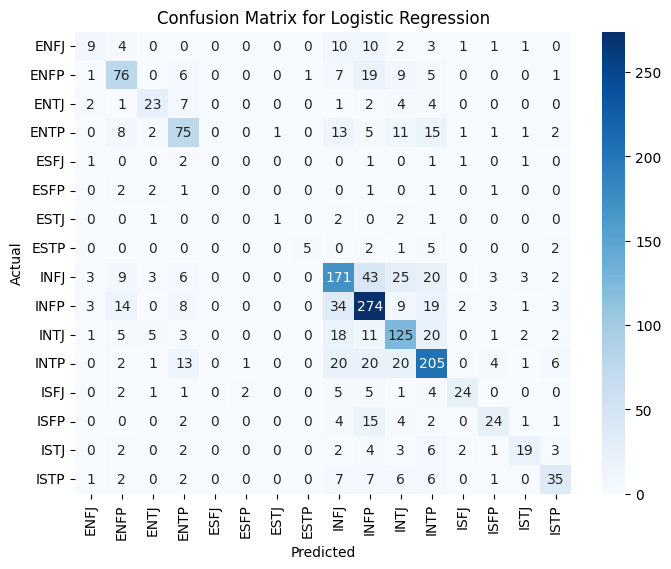

In [ ]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['posts'])
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['posts'])
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


print("Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




---



## **Interpretation:**
**Text Vectorization:**
The CountVectorizer converts text data from the 'posts' column into a bag-of-words model, where each word is represented as a feature. This is a simple way to transform text into numerical data.

**Target Variable:**
The target labels are taken from the 'type' column, which seems to contain class labels (e.g., categories or types of posts).

**Model Training:**
A Logistic Regression model is trained using the transformed text features (X_train) and the target labels (y_train). Logistic regression is used for classification tasks, where the output is a probability of belonging to each class.

`Evaluation Metrics:`

Accuracy: The proportion of correctly classified instances in the test set.
Classification Report: Provides detailed metrics like precision, recall, F1-score for each class.
Confusion Matrix: A visual representation of the true vs. predicted labels, showing how well the model is classifying each class.

##**Inferences:**
**Performance:** If accuracy is high, the model is performing well. If it's low, consider using more advanced models or fine-tuning hyperparameters.

**Confusion Matrix:** Helps identify specific classes where the model is making errors.

**Text Classification:** Logistic regression is suitable for text classification tasks but may require feature engineering or different models (e.g., SVM, Random Forest) for better performance.




---



# **LINEAR REGRESSION**

Target data type: int16
Mean Squared Error (MSE): 8374997.23
Mean Absolute Error (MAE): 2369.98
R^2 Score: -0.35


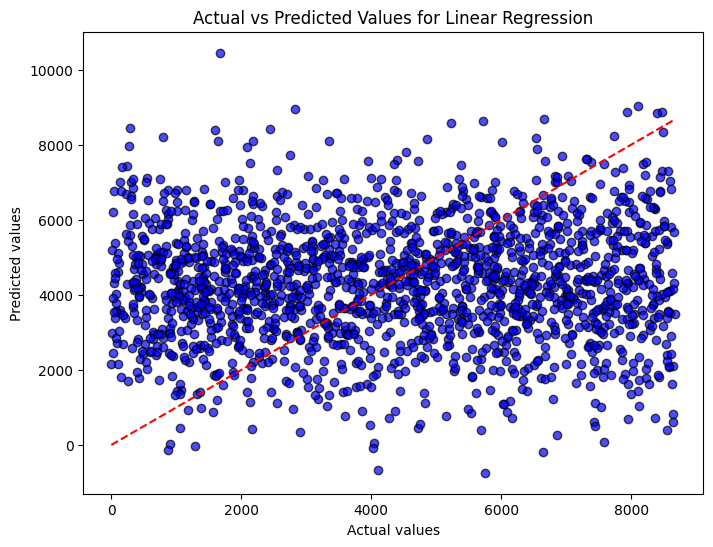

In [ ]:

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['posts'])


data['posts'] = data['posts'].astype('category').cat.codes
y = data['posts']


print("Target data type:", y.dtype)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values for Linear Regression")
plt.show()




---


## **Interpretation:**

**Text Vectorization:**
The TfidfVectorizer converts text data (in the 'posts' column) into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF), which helps in determining the importance of words in a document relative to the entire dataset.

**Target Encoding:**
The 'posts' column is converted into numerical codes, but this is likely incorrect as the same column is being used for both input and output. Typically, you would use a different target column for classification or regression tasks.

**Model Training:**
A Linear Regression model is trained on the transformed input (X_train) and target (y_train) data. This model attempts to find the linear relationship between the input features (text data) and the target (which seems incorrectly set to the same text column).

`Evaluation Metrics:`

**Mean Squared Error (MSE):** Measures the average of the squares of the errors (difference between actual and predicted values). A lower value indicates better performance.

**Mean Absolute Error (MAE):** Measures the average of the absolute errors. Again, a lower value is preferable.
R² Score: Represents how well the model explains the variance in the target variable. A higher value (close to 1) indicates better fit.

`Plotting:`
The scatter plot visualizes the actual vs predicted values, with the red dashed line representing perfect predictions (where actual = predicted). A good model will show points close to this line.

## **Inferences:**
Text data and Linear Regression: Linear regression might not be the best choice for text data. A more suitable approach for text classification or regression would typically involve models like Logistic Regression (for classification) or Random Forest/Gradient Boosting (for regression), especially when working with text features.

**Target Column Issue:** The code uses the 'posts' column as both input and target, which could cause issues. You should assign a different column as the target (e.g., labels for classification or numerical outcomes for regression).

**Performance:** If the R² score is low and MSE/MAE are high, the model is not performing well, indicating that the relationship between the features and the target is not well captured by a linear regression model.



---

